In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-351eba8d-a7a8-a5b4-a01a-d7840925d54b)



### **Mounting Google Drive**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.4.1
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.4.1
2.12.0


### **Importing other required Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import tensorflow_datasets as tfds
import seaborn as sn

In [ ]:
!wget https://raw.githubusercontent.com/gauravreddy08/deep-learning-tensorflow/main/extras/helper_function.py

--2023-05-05 18:47:58--  https://raw.githubusercontent.com/gauravreddy08/deep-learning-tensorflow/main/extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-05 18:47:58 (68.5 MB/s) - ‘helper_function.py’ saved [10246/10246]



In [ ]:
# Prints list of Datasets avaible in Tensorflow Datasets Module

dataset_list = tfds.list_builders()
dataset_list[:10]

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence']

In [ ]:
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                             shuffle_files=False,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteCPQC0P/food101-train.tfrecord*...:   0%|          …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteCPQC0P/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
train_one_sample = train_data.take(1)

In [ ]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_one_sample:
  print(f"""
  Image Shape : {image.shape}
  Image Datatype : {image.dtype}
  Class : {class_names[label.numpy()]}
  """)


  Image Shape : (512, 512, 3)
  Image Datatype : <dtype: 'uint8'>
  Class : huevos_rancheros
  


In [ ]:
image[:2]

<tf.Tensor: shape=(2, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]]], dtype=uint8)>

In [ ]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

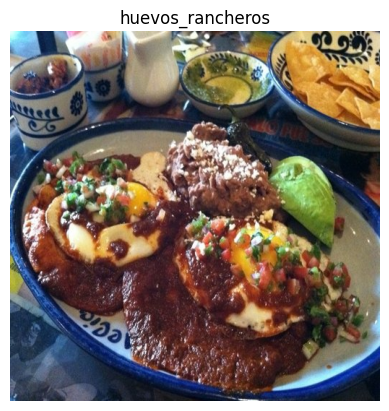

In [ ]:
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

In [ ]:
def preprocess_img(image, label, img_size=224):
  image = tf.image.resize(image, [img_size, img_size])
  image = tf.cast(image, tf.float16)
  return image, label

In [ ]:
# Trying the preprocess function on a single image

preprocessed_img = preprocess_img(image, label)[0]
preprocessed_img

<tf.Tensor: shape=(224, 224, 3), dtype=float16, numpy=
array([[[230.6  , 253.6  , 251.   ],
        [223.   , 255.   , 252.2  ],
        [207.1  , 255.   , 250.4  ],
        ...,
        [140.6  , 129.5  , 121.25 ],
        [121.1  , 115.25 , 116.94 ],
        [ 83.94 ,  83.06 ,  89.6  ]],

       [[221.5  , 254.4  , 253.4  ],
        [214.5  , 255.   , 253.9  ],
        [198.4  , 254.6  , 252.   ],
        ...,
        [208.6  , 195.9  , 173.4  ],
        [197.   , 190.1  , 174.9  ],
        [175.5  , 171.6  , 161.2  ]],

       [[204.2  , 253.4  , 249.6  ],
        [198.8  , 254.6  , 251.2  ],
        [185.   , 251.8  , 252.2  ],
        ...,
        [222.5  , 207.5  , 169.4  ],
        [216.5  , 205.   , 172.   ],
        [215.5  , 207.9  , 177.6  ]],

       ...,

       [[ 47.12 ,  81.06 , 121.2  ],
        [ 30.4  ,  63.62 , 101.3  ],
        [127.4  , 158.9  , 193.   ],
        ...,
        [  3.953,  11.95 ,  23.38 ],
        [  2.27 ,  10.33 ,  21.22 ],
        [  6.863,  16.0

In [ ]:
train_data = train_data.map(preprocess_img, tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)

test_data = test_data.map(preprocess_img, tf.data.AUTOTUNE)
test_data = test_data.batch(32)

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float16, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float16, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
from helper_function import create_tensorboard_callback

In [ ]:
# EarlyStopping Callback

early_stopping_callback = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=3, verbose=1, monitor="val_accuracy")

In [ ]:
# ReduceLROnPlateau Callback

lower_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,
                                                monitor='val_accuracy',
                                                min_lr=1e-7,
                                                patience=0,
                                                verbose=1)

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy='mixed_float16')

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">



### **Building the Model**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB1(include_top=False)

# Input and Data Augmentation
inputs = layers.Input(shape=in/put_shape, name="input_layer")
x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dropout(.3)(x)

x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax")(x)
model = tf.keras.Model(inputs, outputs)

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=["accuracy"])

27018416/27018416 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 activation (Activation)     (None, 101)               0         
                                                             

In [ ]:
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.15 * len(test_data)),
                    callbacks=[create_tensorboard_callback("training-logs", "EfficientNetB1-"),
                               early_stopping_callback,
                               lower_lr])

Saving TensorBoard log files to: training-logs/EfficientNetB1-/20230505-190250


Epoch 1/10
2368/2368 [==============================] - 569s 238ms/step - loss: 1.5406 - accuracy: 0.6012 - val_loss: 1.2711 - val_accuracy: 0.6602 - lr: 0.0010
Epoch 2/10
2368/2368 [==============================] - 561s 236ms/step - loss: 1.1081 - accuracy: 0.7049 - val_loss: 0.9864 - val_accuracy: 0.7373 - lr: 0.0010
Epoch 3/10
2368/2368 [==============================] - 557s 234ms/step - loss: 0.9102 - accuracy: 0.7510 - val_loss: 0.9853 - val_accuracy: 0.7431 - lr: 0.0010
Epoch 4/10
2368/2368 [==============================] - 555s 233ms/step - loss: 0.7573 - accuracy: 0.7880 - val_loss: 0.9558 - val_accuracy: 0.7548 - lr: 0.0010
Epoch 5/10
2368/2368 [==============================] - ETA: 0s - loss: 0.6387 - accuracy: 0.8193
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2368/2368 [==============================] - 556s 234ms/step - loss: 0.6387 - accuracy: 0.8193 - val_loss: 1.0219 - val_accuracy: 0.7492 - lr: 0.0010
Epoch 6/10
2368/2368 [=========

In [ ]:
# Saving the model
model.save("/content/drive/My Drive/FinalModel.hdf5")

In [ ]:
# Saving the model
model.save("FoodVision.hdf5")

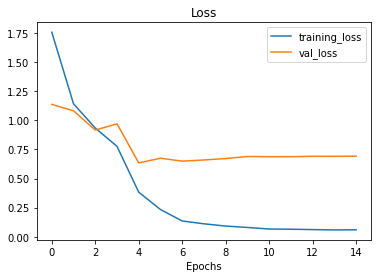

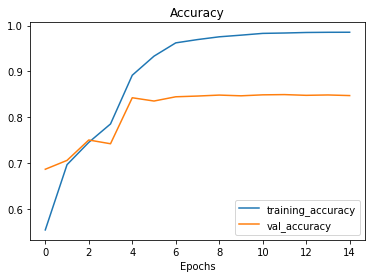

In [ ]:
plot_loss_curves(history)

In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 65s 82ms/step - loss: 0.6972 - accuracy: 0.8428


[0.6971781253814697, 0.8428118824958801]

## **Evaluating our Model**

In [ ]:
pred_probs = model.predict(test_data, verbose=1)
len(pred_probs), pred_probs.shape

790/790 [==============================] - 76s 89ms/step


(25250, (25250, 101))

In [ ]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10], len(pred_classes), pred_classes.shape

(array([ 29,  81,  91,  53,  97,  97,  10,  31,   3, 100]), 25250, (25250,))

In [ ]:
# Getting true labels for the test_data

y_labels = []
test_images = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy())
y_labels[:10]

[29, 81, 91, 53, 97, 97, 10, 31, 3, 100]

In [ ]:
# Predicted Labels vs. True Labels
pred_classes==y_labels

array([ True,  True,  True, ...,  True,  True, False])

### **Sklearn's Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score

sklearn_acc = accuracy_score(y_labels, pred_classes)
sklearn_acc

0.8428118811881188

### **Model's Class-wise Accuracy Score**

In [ ]:
from sklearn.metrics import classification_report
report = (classification_report(y_labels, pred_classes, output_dict=True))

In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in report.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.5870020964360587,
 'baby_back_ribs': 0.8450704225352113,
 'baklava': 0.8960000000000001,
 'beef_carpaccio': 0.902970297029703,
 'beef_tartare': 0.7868217054263565,
 'beet_salad': 0.7590361445783133,
 'beignets': 0.8611670020120724,
 'bibimbap': 0.9295774647887324,
 'bread_pudding': 0.6469428007889546,
 'breakfast_burrito': 0.7427385892116183,
 'bruschetta': 0.7842323651452283,
 'caesar_salad': 0.8778625954198473,
 'cannoli': 0.9149797570850203,
 'caprese_salad': 0.8715953307392996,
 'carrot_cake': 0.831013916500994,
 'ceviche': 0.7404255319148937,
 'cheese_plate': 0.9010101010101009,
 'cheesecake': 0.7613168724279835,
 'chicken_curry': 0.7773279352226721,
 'chicken_quesadilla': 0.8304093567251462,
 'chicken_wings': 0.888015717092338,
 'chocolate_cake': 0.7290836653386455,
 'chocolate_mousse': 0.6456692913385828,
 'churros': 0.9076305220883534,
 'clam_chowder': 0.9054325955734406,
 'club_sandwich': 0.8779527559055117,
 'crab_cakes': 0.7668593448940271,
 'creme_brulee': 0

In [ ]:
report_df = pd.DataFrame(class_f1_scores, index = ['f1-scores']).T

In [ ]:
report_df = report_df.sort_values("f1-scores", ascending=True)

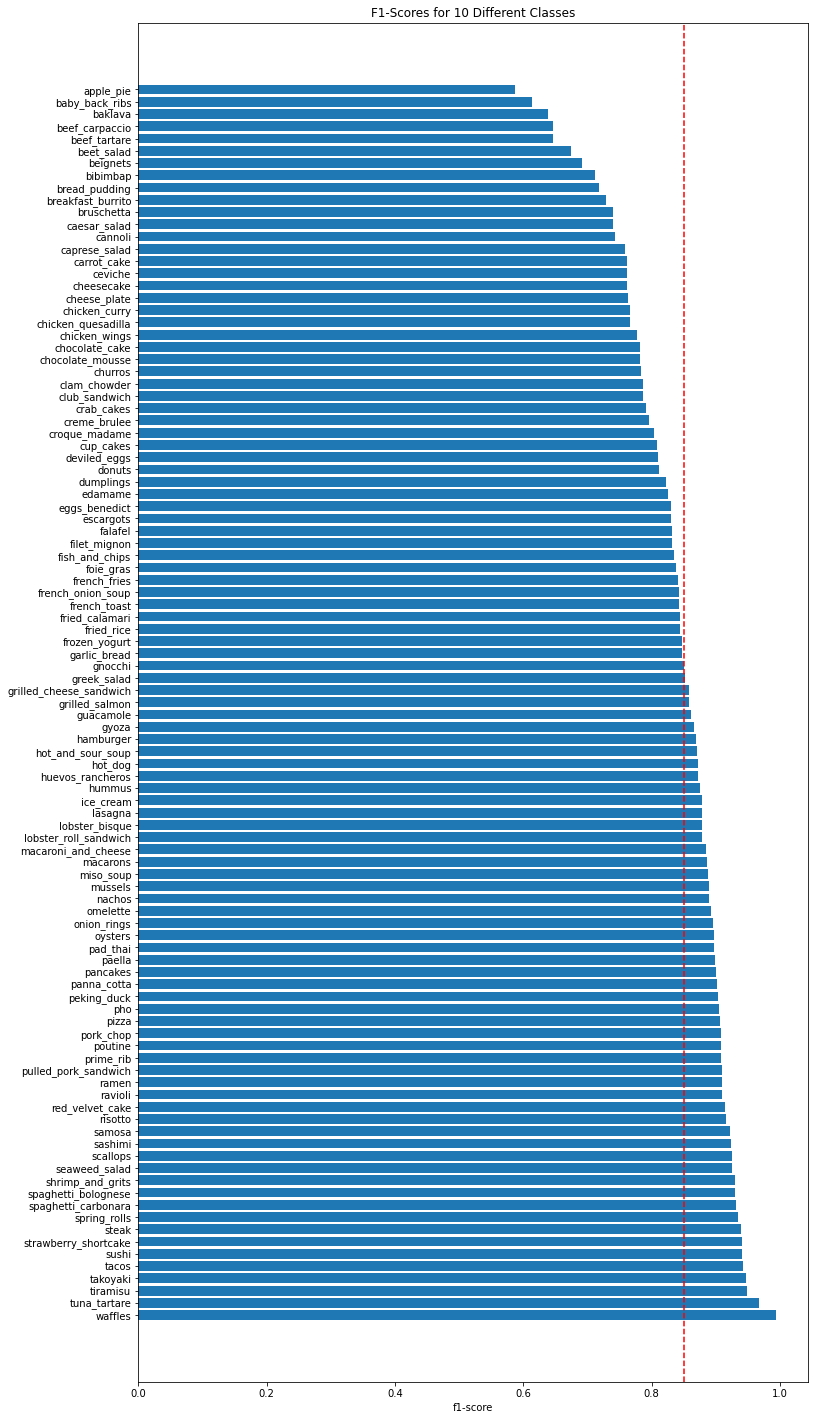

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(report_df)), report_df["f1-scores"].values)
ax.set_yticks(range(len(report_df)))
plt.axvline(x=0.85, linestyle='--', color='r')
ax.set_yticklabels(class_names)
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

In [ ]:
# Get custom food images filepaths
import os

custom_food_images = ["/content/drive/MyDrive/FoodVisionModels/Custom Images/" + img_path for img_path in os.listdir("/content/drive/MyDrive/FoodVisionModels/Custom Images")]
custom_food_images

['/content/drive/MyDrive/FoodVisionModels/Custom Images/download (1).jpeg',
 '/content/drive/MyDrive/FoodVisionModels/Custom Images/download.jpeg',
 '/content/drive/MyDrive/FoodVisionModels/Custom Images/images (8).jpeg']

In [ ]:
def pred_plot_custom(folder_path):
  import os

  custom_food_images = [folder_path + img_path for img_path in os.listdir(folder_path)]
  i=0
  fig,a =  plt.subplots(len(custom_food_images),2, figsize=(15, 5*len(custom_food_images)))

  for img in custom_food_images:
    img = load_and_prep_image(img, scale=False)
    pred_prob = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[pred_prob.argmax()]
    top_5_i = (pred_prob.argsort())[0][-5:][::-1]
    values = pred_prob[0][top_5_i]
    labels = []
    for x in range(5):
      labels.append(class_names[top_5_i[x]])

    # Plotting Image
    a[i][0].imshow(img/255.)
    a[i][0].set_title(f"Prediction: {pred_class}   Probability: {pred_prob.max():.2f}")
    a[i][0].axis(False)

    # Plotting Models Top 5 Predictions
    a[i][1].bar(labels, values, color='orange');
    a[i][1].set_title('Top 5 Predictions')
    i=i+1

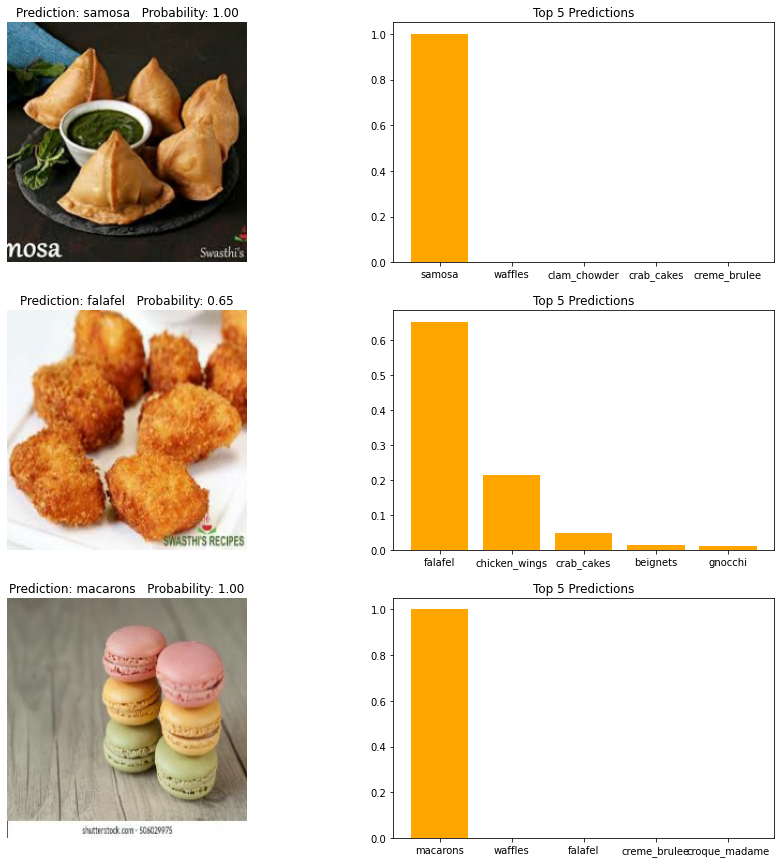

In [ ]:
pred_plot_custom("/content/drive/MyDrive/FoodVisionModels/Custom Images/")